# Decision Tree

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

- Ajustar el modelo a un Decision Tree

- Extraer las métricas

- Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas)

In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

## 1º: Decision Tree Label

In [2]:
df_label = pd.read_csv('../archivos/country_label.csv', index_col=0)
df_label.sample()

,basic,basic_boxcox,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,...,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,square_meter_incentre,monthly_salary,mortgage,country_encod
1495,26.11,6.433267,-0.585227,-0.12963,-1.104167,-0.427746,-0.572464,-0.461818,-0.276479,-1.180556,...,-0.209279,-0.72215,-0.541364,-0.35642,-0.425146,-0.429718,-0.146218,-0.260174,0.897143,52


In [3]:
df_label.drop('basic_boxcox', axis=1, inplace= True)

In [4]:
Xl = df_label.drop("basic", axis = 1)
yl = df_label["basic"]

In [5]:
xl_train, xl_test, yl_train, yl_test = train_test_split(Xl, yl, test_size = 0.3, random_state = 42)

In [6]:
arbol = DecisionTreeRegressor(random_state =0) #creamos árbol

In [7]:
arbol.fit(xl_train, yl_train) #ajustamos el modelo con fit

DecisionTreeRegressor(random_state=0)

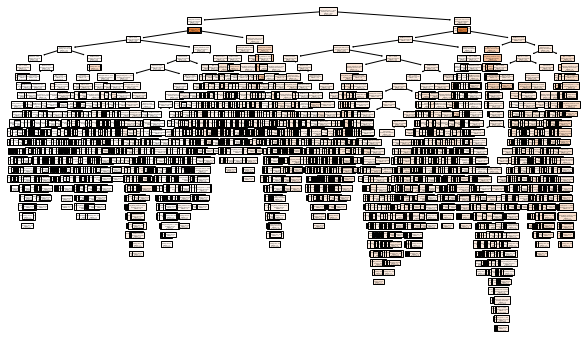

In [8]:
fig = plt.figure(figsize = (10,6))
tree.plot_tree(arbol, feature_names = xl_train.columns, filled = True)
plt.show() 

In [9]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
max_features = np.sqrt(len(xl_train.columns))
max_features

5.0

In [ ]:
print(arbol.tree_.max_depth)

34


In [ ]:
yl_pred_test_dt = arbol.predict(xl_test)
yl_pred_train_dt = arbol.predict(xl_train)

In [ ]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [ ]:
dt_results1l = metricas(yl_test, yl_train, yl_pred_test_dt, yl_pred_train_dt, "Decission Tree 1 Label")
dt_results1l

,MAE,MSE,RMSE,R2,set,modelo
0,5.124420e+01,7.109425e+03,8.431741e+01,-0.050469,test,Decission Tree 1 Label
1,2.985474e-17,8.485227e-31,9.211529e-16,1.000000,train,Decission Tree 1 Label
